# Movie Recommendation System Project

In [1]:
import numpy as np
import pandas as pd
import warnings


In [2]:
warnings.filterwarnings('ignore')

### Get the Dataset

In [6]:
columns_name=["User-Id", "Item-Id", "Rating", "Timestamp"]
df=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/ml-100k/ml-100k/u.data", sep='\t', names=columns_name)

In [7]:
df.head()

,User-Id,Item-Id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
df.shape

(100000, 4)

In [9]:
df['User-Id'].nunique()

943

In [10]:
df['Item-Id'].nunique()

1682

In [12]:
movie_titles=pd.read_csv("C:/Users/SIDDHARTH/desktop/ML and Data Science/ml-100k/ml-100k/u.item", sep="\|", header=None)

In [15]:
movie_titles=movie_titles[[0,1]]

In [17]:
movie_titles.columns=['Item-Id', 'Title']

In [18]:
movie_titles.head()

,Item-Id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [19]:
df=pd.merge(df,movie_titles, on="Item-Id")

In [20]:
df

,User-Id,Item-Id,Rating,Timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [25]:
df.groupby('Title').mean()['Rating'].sort_values(ascending=False)

Title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: Rating, Length: 1664, dtype: float64

In [28]:
df.groupby('Title').count()['Rating'].sort_values(ascending=False)

Title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: Rating, Length: 1664, dtype: int64

In [52]:
ratings=pd.DataFrame(df.groupby('Title').mean()['Rating'])

In [30]:
ratings.head()

,Rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [75]:
ratings['Number of Ratings']=pd.DataFrame(df.groupby('Title').count()['Rating'])

In [76]:
ratings

,Rating,Number of Ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [73]:
ratings.sort_values(by="Rating", ascending=False)

,Rating
Title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
King of New York (1990),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


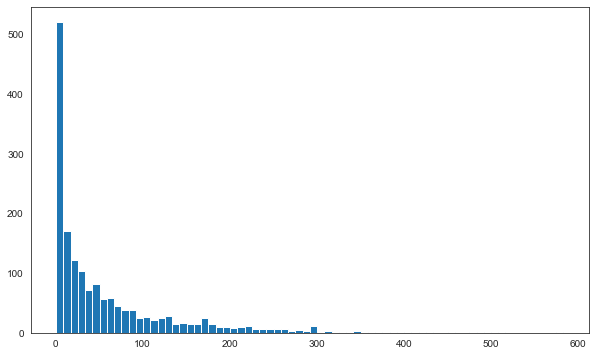

In [36]:
plt.figure(figsize=(10,6))
plt.hist(ratings['Number of Ratings'], bins=70)
plt.show()

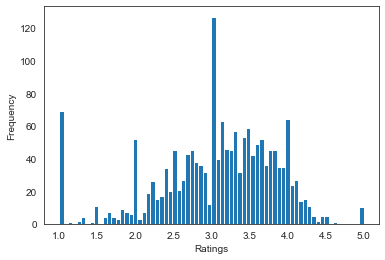

In [40]:
plt.hist(ratings['Rating'],bins=70)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

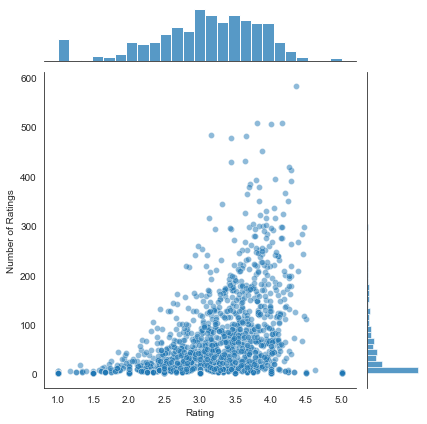

In [43]:
sns.jointplot(x='Rating' ,y='Number of Ratings' ,data=ratings,alpha=0.5)

In [45]:
df.head()

,User-Id,Item-Id,Rating,Timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [55]:
movie_matrix=df.pivot_table(index='User-Id', columns='Title', values="Rating")

In [57]:
movie_matrix

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
User-Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
star_wars_ratings=movie_matrix['Star Wars (1977)']
star_wars_ratings.head()

User-Id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [62]:
similar_to_star_wars=movie_matrix.corrwith(star_wars_ratings)

In [63]:
similar_to_star_wars

Title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [64]:
corr_StarWars=pd.DataFrame(similar_to_star_wars,columns=['Correlation'])

In [66]:
corr_StarWars.dropna(inplace=True)

In [67]:
corr_StarWars.head()

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [68]:
corr_StarWars.sort_values('Correlation',ascending=False).head(n=10)

,Correlation
Title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [78]:
ratings

,Rating,Number of Ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [82]:
corr_StarWars=corr_StarWars.join(ratings['Number of Ratings'])
corr_StarWars.head()

,Correlation,Number of Ratings
Title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [83]:
corr_StarWars[corr_StarWars['Number of Ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,Number of Ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Prediction

In [102]:
def predict_movies(movie_name):
    movie_user_rating=movie_matrix[movie_name]
    similar_to_movie=movie_matrix.corrwith(movie_user_rating)
    
    corr_movie=pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.join(ratings['Number of Ratings'])
    predictions=corr_movie[corr_movie['Number of Ratings']>100].sort_values('Correlation', ascending=False)
    
    return predictions

## Sample Test 

In [103]:
predictions=predict_movies("Titanic (1997)")

In [104]:
predictions.head()

,Correlation,Number of Ratings
Title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
